# 🤖 Introduction to Neural Networks

Neural networks are a fundamental concept in machine learning, inspired by how the human brain works.

They consist of layers of connected nodes (neurons) that can **learn complex patterns** from data by adjusting their internal parameters.

### Why Use Neural Networks?

- Capable of modeling **nonlinear relationships**
- Widely used in real-world tasks such as:
  - **Image recognition** (e.g., face detection)
  - **Natural language processing** (e.g., sentiment analysis)
  - **Time series prediction** (e.g., stock prices, energy demand)
- Neural networks are the foundation of **deep learning**.

> 📌 A neural network "learns" by making predictions, comparing them to actual results, and adjusting its parameters to reduce errors over time.

# 🧠 Biological vs. Artificial Neurons

Neural networks take inspiration from **biological neurons** in the brain.

### Biological Neuron:
- Dendrites receive input signals
- Axon sends the output signal
- Synapses connect neurons

### Artificial Neuron:
- **Input layer** receives data
- Each input is **multiplied by a weight**
- All inputs are **summed and passed through an activation function**
- The output is sent to the next layer

### Neuron Formula:

$
z = \sum_{i=1}^{n} w_i x_i + b
\quad \text{and} \quad
a = \sigma(z)
$

- $ x_i $: input features
- $ w_i $: weights
- $ b $: bias
- $ \sigma $: activation function
- $ a $: output of the neuron

> ⚡ This simple computation is the building block of powerful learning systems.

# 🏗️ Architecture of a Neural Network

A neural network is made up of **layers of neurons**:

### 1. Input Layer
- Receives raw features from the dataset
- One node per feature

### 2. Hidden Layers
- Perform transformations using weights and activation functions
- Can have one or more layers (deeper = more powerful)
- Allow the network to learn **complex patterns**

### 3. Output Layer
- Produces final predictions
- Number of nodes depends on the task:
  - 1 for binary classification
  - N for multi-class classification

### Real-World Analogy

> Imagine you're trying to identify if an image is a cat:
> - Input: pixel values
> - Hidden layers: extract patterns (e.g., edges, shapes, eyes)
> - Output: "cat" or "not cat"

We'll now build and visualize a simple neural network using `Keras`.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Build a simple neural network
model = Sequential([
    Dense(8, input_shape=(4,), activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

## This example builds a network with:

	•	4 input features (e.g., from the Iris dataset)
	•	2 hidden layers with ReLU activation
	•	1 output neuron with sigmoid activation for binary classification


# 🔁 Forward Propagation: How Neural Networks Make Predictions

**Forward propagation** is the process by which input data passes through the layers of the network to generate a prediction.

### Step-by-step Flow:

1. **Input Layer**: Each feature is fed into the network.
2. **Weighted Sum**: Each hidden neuron computes a weighted sum of inputs:
  $
   z = \sum w_i x_i + b
   $
3. **Activation Function**: The result is passed through a nonlinear function (like ReLU or Sigmoid).
4. **Repeat for Layers**: The output becomes input for the next layer.
5. **Output Layer**: Produces final prediction (e.g., class label or value).

> 🧠 Each neuron transforms data a little, and together, they create deep representations.

### Example Use Case:
Forward propagation helps a neural network predict whether a transaction is fraudulent based on features like amount, time, and location.

In [ ]:
import numpy as np

# Define simple weights, bias, and activation
def relu(x):
    return np.maximum(0, x)

# Input features (e.g., 3 features of a transaction)
x = np.array([0.7, 0.2, 0.5])
weights = np.array([0.4, -0.6, 0.9])
bias = 0.1

# Forward pass for one neuron
z = np.dot(x, weights) + bias
a = relu(z)

print("Weighted sum (z):", z)
print("Activated output (a):", a)

Weighted sum (z): 0.71
Activated output (a): 0.71


# 🔄 Loss Function & Backpropagation

Once a prediction is made through forward propagation, we need to measure how **wrong or right** it is. That’s where the **loss function** comes in.

### 🔹 Loss Function
Quantifies the error between the predicted output and actual label.

- For classification: **Binary Cross-Entropy**
- For regression: **Mean Squared Error (MSE)**

$
\text{Loss} = \frac{1}{n} \sum (y_{\text{true}} - y_{\text{pred}})^2
$

---

### 🔁 Backpropagation
After computing the loss, the network adjusts weights to reduce error.

1. Compute **gradients** of the loss w.r.t. each weight using calculus (chain rule).
2. Propagate the error **backward** through the network.
3. Update weights using the **optimizer**.

> 🔁 This process repeats for many iterations (epochs) during training, allowing the model to learn.

### Real-World Analogy:
Imagine throwing darts at a target (prediction) and adjusting your aim (weights) every time based on how far you missed (loss).

In [ ]:
import tensorflow as tf

# True label (e.g., transaction is actually fraudulent)
y_true = tf.constant([1.0])

# Predicted probability from sigmoid output
y_pred = tf.constant([0.8])

# Binary cross-entropy loss
bce_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)

print("Binary Cross-Entropy Loss:", bce_loss.numpy())

Binary Cross-Entropy Loss: 0.22314353


# 🧮 Activation Functions: Adding Non-Linearity

Activation functions help neural networks learn complex, non-linear relationships. Without them, the network would just behave like a linear model!

Let’s explore three of the most common activation functions:

---

### ⚪ Sigmoid Function

$
\sigma(x) = \frac{1}{1 + e^{-x}}
$

- Outputs values between **0 and 1**
- Often used in the **output layer** for binary classification
- **Squashes input** to a smooth, S-shaped curve

---

### 🔷 Tanh (Hyperbolic Tangent) Function

$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$

- Outputs values between **-1 and 1**
- Centered at **zero**, which often helps the network converge faster than sigmoid
- Like sigmoid, has a smooth, S-shaped curve but with **symmetric output**

---

### 🔲 ReLU (Rectified Linear Unit)

$
f(x) = \max(0, x)
$

- Outputs **0 for negative** inputs and **linear for positive** inputs
- Most widely used in **hidden layers**
- Helps solve the **vanishing gradient problem** that occurs with sigmoid/tanh

---

### 🧠 When to Use What?

| Function | Use Case |
|----------|----------|
| Sigmoid  | Output layer (binary classification) |
| Tanh     | Hidden layers (when zero-centered output is beneficial) |
| ReLU     | Hidden layers of deep neural networks |

> 🔍 The choice of activation function can drastically impact model performance.

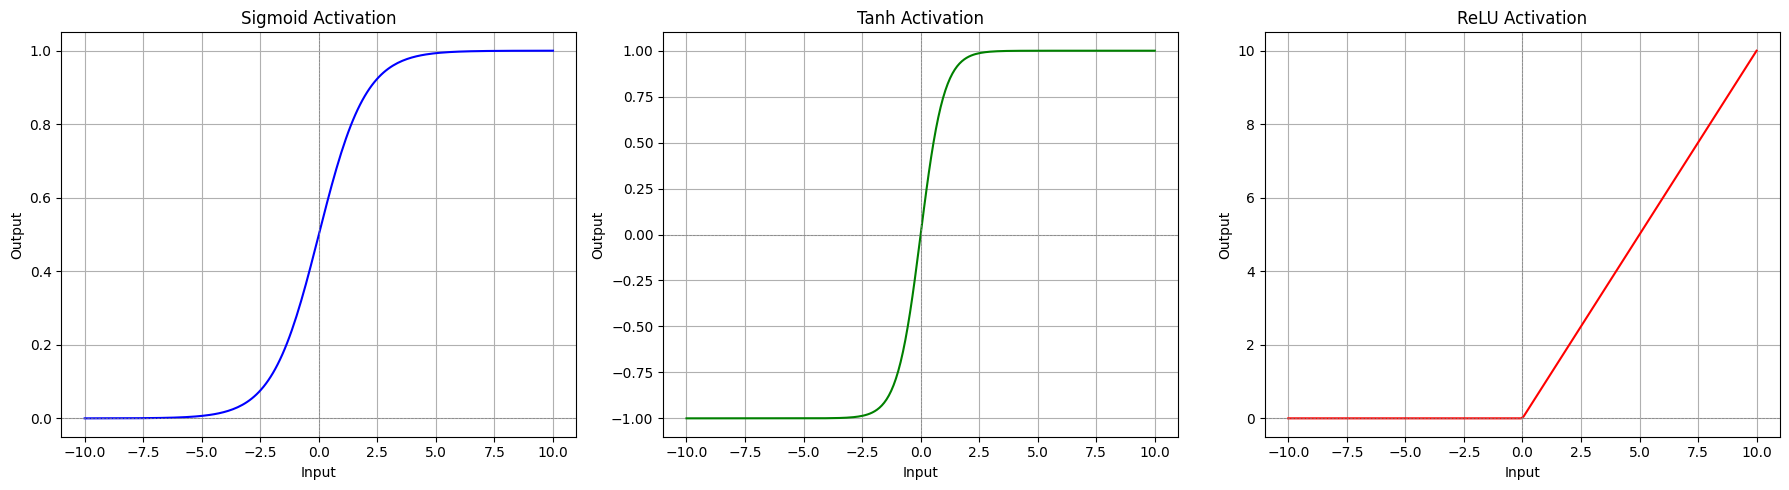

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate input values
x_vals = np.linspace(-10, 10, 200)

# Activation functions
sigmoid = 1 / (1 + np.exp(-x_vals))
tanh = np.tanh(x_vals)
relu = np.maximum(0, x_vals)

# Plotting
plt.figure(figsize=(18, 5))

# Sigmoid plot
plt.subplot(1, 3, 1)
plt.plot(x_vals, sigmoid, label='Sigmoid', color='blue')
plt.title('Sigmoid Activation')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.5, linestyle='--')

# Tanh plot
plt.subplot(1, 3, 2)
plt.plot(x_vals, tanh, label='Tanh', color='green')
plt.title('Tanh Activation')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.5, linestyle='--')

# ReLU plot
plt.subplot(1, 3, 3)
plt.plot(x_vals, relu, label='ReLU', color='red')
plt.title('ReLU Activation')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.5, linestyle='--')

plt.tight_layout()
plt.show()

# ⚔️ Activation Function Comparison & Challenges

Understanding when to use each activation function can help you **debug training issues** and **optimize model performance**.

---

### 🔍 Comparison Table

| Function | Output Range | Non-Linearity | Derivatives | Common Use |
|----------|---------------|---------------|-------------|-------------|
| Sigmoid  | (0, 1)        | Yes           | Small when far from 0 (vanishing gradients) | Binary classification output |
| ReLU     | [0, ∞)        | Yes           | 0 for x < 0, 1 for x > 0 | Hidden layers |
| Tanh     | (-1, 1)       | Yes           | Steeper than sigmoid but still prone to vanishing gradients | Sometimes used in RNNs |

---

### ⚠️ Challenges

- **Sigmoid and Tanh** can cause **vanishing gradients** (weights update very slowly).
- **ReLU** can suffer from "dead neurons" (always outputs 0 if stuck in negative input).

> 💡 The right activation function depends on your network depth, task type, and experimentation!

# 🚀 Optimizers and Learning Rate: How Neural Networks Learn

An **optimizer** updates the weights of a neural network during training to **minimize the loss function**.

---

### 🔧 Common Optimizers:

| Optimizer | Description |
|----------|-------------|
| **SGD** (Stochastic Gradient Descent) | Updates weights using small batches. Simple and efficient but can be slow. |
| **Adam** | Combines momentum and adaptive learning rates. **Most popular** and robust for most use cases. |
| **RMSprop** | Similar to Adam, designed for time series and non-stationary data. |

---

### 🔑 Learning Rate (LR)

The **learning rate** controls how big a step the optimizer takes when adjusting weights.

- **Too high** → unstable training, may never converge
- **Too low** → very slow training or stuck in suboptimal solutions

---

### 📈 Visualization

> Imagine hiking downhill:
> - A **large learning rate** is like taking giant leaps—you might overshoot the valley.
> - A **small learning rate** is like tiny steps—it’s safe but slow.

Choosing the **right optimizer and learning rate** is crucial to training success.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


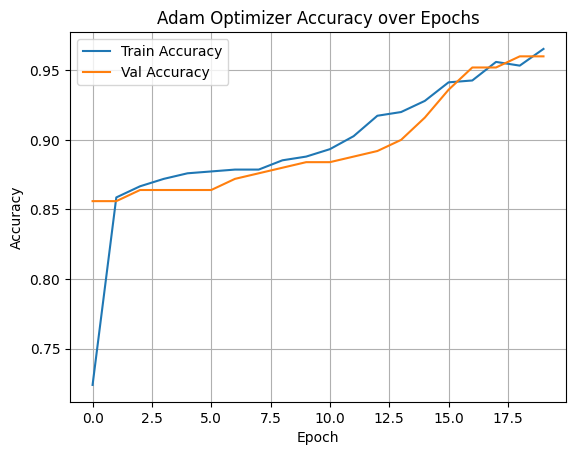

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create toy dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Build model using Adam optimizer
model_adam = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),
    Dense(1, activation='sigmoid')
])

model_adam.compile(optimizer=Adam(learning_rate=0.01),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Train model
history = model_adam.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=0)

# Plot accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Adam Optimizer Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# 🧪 Overfitting and Regularization: Making Your Model Generalize

**Overfitting** happens when a model performs well on training data but poorly on new, unseen data. The model **memorizes noise** instead of learning general patterns.

---

### 🔍 Symptoms of Overfitting:
- High training accuracy, low validation accuracy
- Loss increases on validation set over time

---

### 🛠 Regularization Techniques

| Method | Description |
|--------|-------------|
| **Dropout** | Randomly "turns off" neurons during training to prevent dependency on specific features |
| **L2 Regularization** | Adds a penalty for large weights in the loss function |
| **Early Stopping** | Stops training when validation performance stops improving |

---

### Real-World Analogy:
> Overfitting is like cramming for an exam with practice questions—you ace the practice but fail on new questions.  
> Regularization is like **studying concepts**, so you perform well across **any** questions.

The goal is to build models that **generalize**, not just memorize.

# 🖼️ Convolutional Neural Networks (CNNs)

CNNs are specially designed to process **image data** by capturing spatial patterns such as edges, textures, and shapes.

---

### 🧱 CNN Layers

| Layer Type | Purpose |
|------------|---------|
| **Convolution Layer** | Detects features (e.g., lines, edges) using small filters |
| **Activation (ReLU)** | Adds non-linearity |
| **Pooling Layer** | Downsamples the image to reduce dimensionality |
| **Fully Connected Layer** | Performs final classification |

---

### 🧠 Why CNNs Work Well

- **Parameter sharing**: Same filter applied across image reduces model size
- **Translation invariance**: Learns to recognize patterns regardless of position
- **Hierarchical pattern recognition**: First layers detect edges, deeper layers detect objects

---

### Real-World Applications

- Facial recognition 😃
- Medical imaging (e.g., tumor detection) 🧬
- Self-driving car vision 🚗

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Simple CNN model (without training yet)
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

# 🧠 Building a Simple CNN in Keras

This code defines a **Convolutional Neural Network (CNN)** using TensorFlow Keras. CNNs are especially well-suited for **image classification tasks** because they automatically detect and learn **spatial hierarchies** of features (edges, shapes, textures, etc.).

Let’s break it down:

---

### 📦 Imports

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

```

- Sequential: A linear stack of layers — used when each layer has one input and one output.
- Conv2D: Applies a 2D convolution operation — essential for detecting features like edges.
- MaxPooling2D: Reduces spatial dimensions (height and width), keeping the most important features.
- Flatten: Converts 2D feature maps into a 1D vector to feed into dense layers.
- Dense: Fully connected neural network layers.

⸻

🏗️ CNN Architecture (Before Training)

```python
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
```

Let’s go layer-by-layer:

🔹 Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))
- 32 filters (or kernels), each of size 3×3.
- ReLU activation introduces non-linearity.
- input_shape=(28, 28, 1) specifies 28x28 grayscale images (1 channel).

🔹 MaxPooling2D((2, 2))
- Downsamples the feature map using a 2×2 window.
- Reduces computation and helps extract dominant features.

🔹 Flatten()
- Converts the 2D feature map into a 1D array.
- This is needed to connect the convolutional part to fully connected layers.

🔹 Dense(64, activation='relu')
- A fully connected layer with 64 neurons.
- Learns high-level combinations of the features.

🔹 Dense(10, activation='softmax')
- Output layer with 10 units (assuming 10 classes for classification).
- Softmax gives a probability distribution over the classes.

⸻

🧾 Model Summary

```python
cnn_model.summary()
```
This line prints the model architecture, including:
-	Layer types
-	Output shapes
-	Number of trainable parameters

⸻

🧠 Why Use a CNN?

CNNs are ideal for tasks like digit classification (e.g., MNIST) because they:
-	Automatically learn filters for feature detection.
-	Require fewer parameters than fully connected networks.
-	Preserve spatial structure of the image during early layers.

✅ This is a great starting point for tasks like handwritten digit recognition, medical image analysis, or real-time object detection — just plug in data and start training!


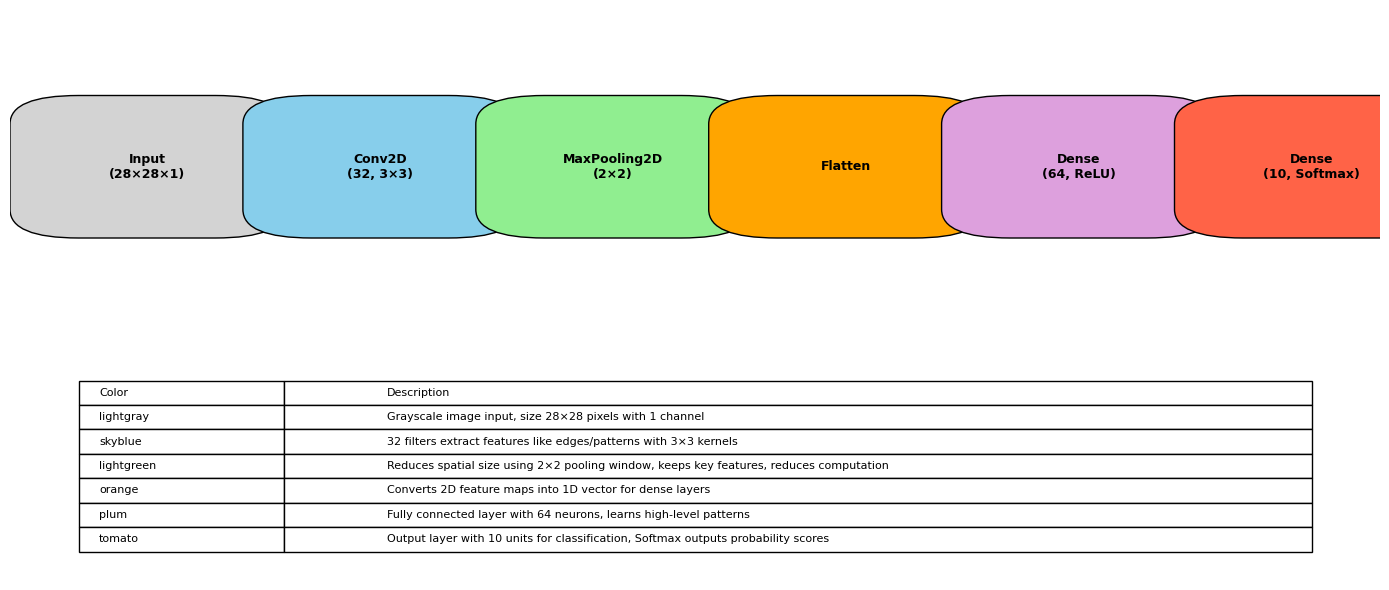

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('off')

# Define CNN layers with labels, colors, and descriptions
layers_detailed = [
    {
        "label": "Input\n(28×28×1)",
        "desc": "Grayscale image input, size 28×28 pixels with 1 channel",
        "x": 0.05, "color": "lightgray"
    },
    {
        "label": "Conv2D\n(32, 3×3)",
        "desc": "32 filters extract features like edges/patterns with 3×3 kernels",
        "x": 0.22, "color": "skyblue"
    },
    {
        "label": "MaxPooling2D\n(2×2)",
        "desc": "Reduces spatial size using 2×2 pooling window, keeps key features, reduces computation",
        "x": 0.39, "color": "lightgreen"
    },
    {
        "label": "Flatten",
        "desc": "Converts 2D feature maps into 1D vector for dense layers",
        "x": 0.56, "color": "orange"
    },
    {
        "label": "Dense\n(64, ReLU)",
        "desc": "Fully connected layer with 64 neurons, learns high-level patterns",
        "x": 0.73, "color": "plum"
    },
    {
        "label": "Dense\n(10, Softmax)",
        "desc": "Output layer with 10 units for classification, Softmax outputs probability scores",
        "x": 0.90, "color": "tomato"
    }
]

# Draw layer boxes
for layer in layers_detailed:
    rect = patches.FancyBboxPatch(
        (layer["x"], 0.65), 0.1, 0.15,
        boxstyle="round,pad=0.05",
        edgecolor="black",
        facecolor=layer["color"]
    )
    ax.add_patch(rect)
    ax.text(layer["x"] + 0.05, 0.725, layer["label"],
            ha='center', va='center', fontsize=9, weight='bold')

# Create legend table with color names
table_text = [["Color", "Description"]]
for layer in layers_detailed:
    table_text.append([layer["color"], layer["desc"]])

# Add table below the diagram
table = plt.table(cellText=table_text,
                  colWidths=[0.15, 0.75],
                  cellLoc='left',
                  loc='bottom',
                  bbox=[0.05, 0.05, 0.9, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(8)

plt.tight_layout()
plt.show()

# 🔁 Recurrent Neural Networks (RNNs)

RNNs are designed to handle **sequential data**, where the order of input matters.

---

### 🔄 Key Feature: Memory

RNNs retain a **hidden state** that is updated as each time step is processed. This makes them ideal for:
- Time series forecasting (e.g., stock prices)
- Natural language processing (e.g., next word prediction)
- Speech recognition

---

### 🔄 Variants of RNNs

| Type | Description |
|------|-------------|
| **Vanilla RNN** | Basic form, prone to vanishing gradients |
| **LSTM (Long Short-Term Memory)** | Adds gates to remember long-term dependencies |
| **GRU (Gated Recurrent Unit)** | Simplified version of LSTM with similar performance

---

> 🧠 LSTMs help capture **context** across long sequences, like remembering the subject of a sentence across multiple words.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# LSTM for sequence prediction (input shape: time steps x features)
rnn_model = Sequential([
    LSTM(64, input_shape=(10, 5)),  # e.g., 10 time steps with 5 features each
    Dense(1)
])

rnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,985 (70.25 KB)

 Trainable params: 17,985 (70.25 KB)

 Non-trainable params: 0 (0.00 B)

# 🔁 Understanding a Simple RNN (LSTM) in Keras

This code defines a **Recurrent Neural Network (RNN)** using an **LSTM (Long Short-Term Memory)** layer via TensorFlow Keras. RNNs are ideal for processing **sequential data**, such as time series, language, or sensor signals.

Let’s walk through the components:

---

### 📦 Imports

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
```
- Sequential: A simple linear stack of layers — each layer has one input and one output.
- LSTM: A special kind of RNN layer that can learn long-term dependencies. It’s designed to remember context across time steps.
- Dense: A standard fully connected layer used at the output.

---

🏗️ RNN Architecture

```python
rnn_model = Sequential([
    LSTM(64, input_shape=(10, 5)),
    Dense(1)
])
```
Let’s break this down:

🔹 LSTM(64, input_shape=(10, 5))
- 64 units (neurons) in the LSTM layer — the number of output dimensions.
- input_shape=(10, 5):
- The model expects input sequences of 10 time steps, and each time step has 5 features.
- This is suitable for structured sequence input like:
  - Time series forecasting
  - Sensor signal classification
  - Financial trend prediction

LSTM cells internally manage:
- Input gates (what to remember from new input),
- Forget gates (what to forget from previous state),
- Output gates (what to output at each time step),
- This helps mitigate vanishing/exploding gradients common in traditional RNNs.

🔹 Dense(1)
- A fully connected layer with 1 output.
- Often used for regression or binary classification from the learned sequence embedding.
- The LSTM’s final output (from the last time step) is passed to this layer.

⸻

🧾 Model Summary
```python
rnn_model.summary()
```
This prints a table showing:
- Layer types and output shapes
- Number of trainable parameters

⸻

🔍 When to Use LSTM?

- Time Series Forecasting
  - Predict future values based on past trends
- Natural Language Processing
  - Model word sequences or generate text
- Anomaly Detection
  - Learn normal sequence patterns, flag outliers
- Event Prediction
  - Detect patterns in customer behavior, health data, etc.

🧠 LSTMs are powerful for learning from ordered, context-sensitive data, especially when temporal relationships matter.





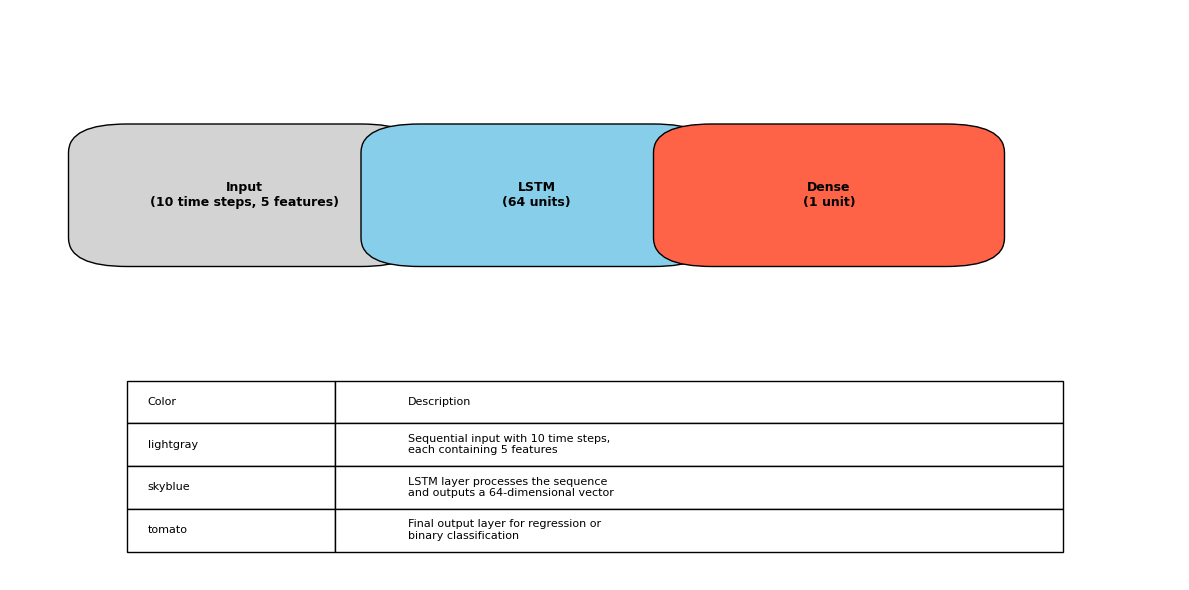

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

# Define RNN model layers with color, label, description, and x-position
layers_rnn = [
    {
        "label": "Input\n(10 time steps, 5 features)",
        "desc": "Sequential input with 10 time steps,\neach containing 5 features",
        "x": 0.1, "color": "lightgray"
    },
    {
        "label": "LSTM\n(64 units)",
        "desc": "LSTM layer processes the sequence\nand outputs a 64-dimensional vector",
        "x": 0.35, "color": "skyblue"
    },
    {
        "label": "Dense\n(1 unit)",
        "desc": "Final output layer for regression or\nbinary classification",
        "x": 0.6, "color": "tomato"
    }
]

# Draw each layer block
for layer in layers_rnn:
    rect = patches.FancyBboxPatch(
        (layer["x"], 0.6), 0.2, 0.15,
        boxstyle="round,pad=0.05",
        edgecolor="black",
        facecolor=layer["color"]
    )
    ax.add_patch(rect)
    ax.text(layer["x"] + 0.1, 0.675, layer["label"],
            ha='center', va='center', fontsize=9, weight='bold')

# Add legend table with color names and descriptions
table_text = [["Color", "Description"]]
for layer in layers_rnn:
    table_text.append([layer["color"], layer["desc"]])

table = plt.table(
    cellText=table_text,
    colWidths=[0.2, 0.7],
    cellLoc='left',
    loc='bottom',
    bbox=[0.1, 0.05, 0.8, 0.3]
)
table.auto_set_font_size(False)
table.set_fontsize(8)

plt.tight_layout()
plt.show()

# 📦 Transfer Learning: Reusing Pre-Trained Models

Training a deep model from scratch requires LOTS of data and computing power. **Transfer learning** solves this by **reusing a model trained on one task** and adapting it to a new, related task.

---

### ⚙️ How It Works

1. Take a model pre-trained on a large dataset (e.g., ImageNet).
2. Remove the final classification layers.
3. Add your own output layer for your task.
4. Fine-tune on your data.

---

### Real-World Use Cases

- 🩻 Medical image classification (using ImageNet-pretrained CNN)
- 🐶 Animal species detection
- 🌱 Plant disease recognition with small datasets

> 🧠 Pre-trained models save time and resources and can **boost accuracy**—especially on small or niche datasets.

# 🧪 Demo: Classifying Handwritten Digits with CNN

We'll now build and train a CNN using the **MNIST dataset** of 28x28 pixel images of handwritten digits (0–9).

Each image is grayscale and labeled with the correct digit.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.8487 - loss: 0.5293 - val_accuracy: 0.9807 - val_loss: 0.0737
Epoch 2/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9799 - loss: 0.0680 - val_accuracy: 0.9858 - val_loss: 0.0566
Epoch 3/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9854 - loss: 0.0475 - val_accuracy: 0.9897 - val_loss: 0.0427
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9827 - loss: 0.0497
Test Accuracy: 0.9869
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


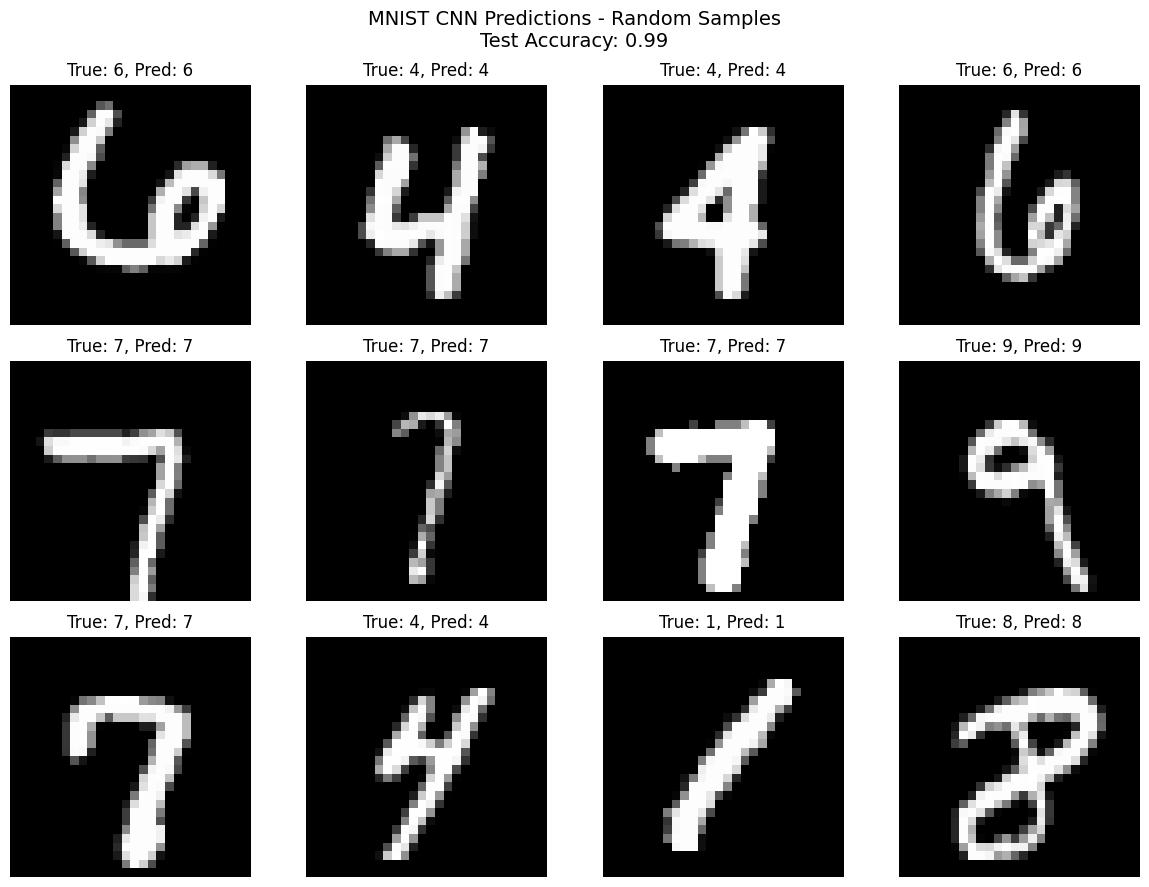

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


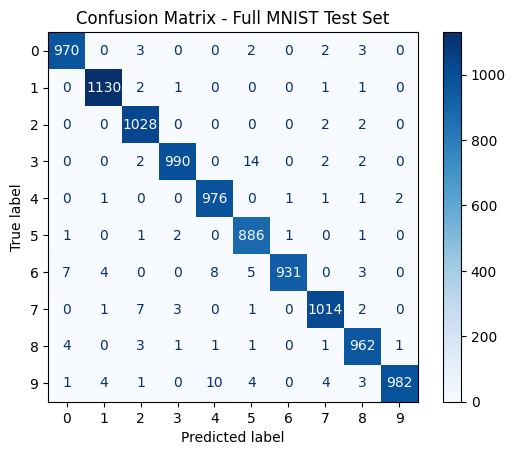

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build CNN model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_cat, epochs=3, batch_size=64, validation_split=0.1, verbose=1)

# Evaluate accuracy
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict and visualize results for random samples
random_indices = np.random.choice(len(X_test), 12, replace=False)
X_sample = X_test[random_indices]
y_true_sample = y_test[random_indices]
y_pred_sample = np.argmax(model.predict(X_sample), axis=1)

fig, axes = plt.subplots(3, 4, figsize=(12, 9))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_sample[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_true_sample[i]}, Pred: {y_pred_sample[i]}")
    ax.axis('off')

plt.suptitle(f'MNIST CNN Predictions - Random Samples\nTest Accuracy: {test_acc:.2f}', fontsize=14)
plt.tight_layout()
plt.show()

# Confusion Matrix on Full Test Set
y_pred_full = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred_full)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Full MNIST Test Set")
plt.show()

# 🧠 Why This Model Works Effectively

The CNN performs well on MNIST because:

1. **Local Feature Detection**: Convolutional filters capture small visual patterns like strokes, loops, and angles that form digits.
2. **Spatial Hierarchies**: Pooling and deeper convolution layers allow the network to build increasingly abstract features.
3. **Parameter Sharing**: Filters reuse the same weights across spatial locations, improving generalization and reducing overfitting.
4. **Grayscale Simplicity**: MNIST images are simple, consistent, and centered, reducing the need for complex pre-processing.
5. **Softmax Output**: Final layer confidently assigns one of 10 digit classes.

The **confusion matrix** helps identify if certain digits (like 3 vs 5 or 4 vs 9) are frequently misclassified—often due to their similar shapes.

> 🧪 This demo shows how CNNs excel in image classification, especially when visual consistency and structure exist in the dataset.

# 🧠 Final Thoughts: Neural Networks in the Real World

Neural networks are powering **modern AI systems** across industries.

### Where They’re Used:

- 📱 Voice Assistants (e.g., Siri, Alexa)
- 🧠 Brain-Computer Interfaces
- 🔍 Fraud Detection
- 🏥 Healthcare diagnostics
- 📸 Social media filters

---

### Key Takeaways:

- Neural networks **learn by adjusting weights** through forward and backward passes.
- **Activation functions, loss, optimizers**, and **architectures** shape the learning process.
- Specialized forms like **CNNs, RNNs, and Transfer Learning** enable applications in **images, language, and sequences**.

> 🚀 You now have the tools to start building and experimenting with your own neural networks!

# 🧪 Practice Exercises: Build Your Neural Network Muscles 💪

Try out these

Absolutely! Here’s a final section for your Jupyter Notebook that includes **practice exercises** to reinforce learning and a **6-question multiple-choice quiz** with hidden answers using collapsible HTML blocks.

---

### 📘 Slide 15: Practice Exercises

# 🏋️ Practice Exercises

Try these exercises to deepen your understanding and build hands-on experience with neural networks:

---

### 📌 Beginner

1. Build a simple neural network (2 hidden layers) using `Keras` to classify the Iris dataset.
2. Compare the performance of Sigmoid vs ReLU activation in a small neural network.
3. Visualize how changing the learning rate affects training accuracy.

---

### 📌 Intermediate

4. Use an LSTM to predict the next value in a simple time series (e.g., sine wave or stock prices).
5. Modify the CNN example to include **Dropout** and observe its impact on overfitting.
6. Load a small custom image dataset (e.g., cats vs dogs) and fine-tune a pre-trained model (e.g., MobileNet or VGG16) using transfer learning.

---

> 🧪 Tip: Use TensorBoard for tracking experiments and visualizing training metrics!

# 🧪 Practice Exercises with Hidden Solutions

Try these exercises to deepen your understanding and build hands-on experience with neural networks.

---

## 📌 Beginner Level

### 🧠 1. Build a simple neural network (2 hidden layers) using Keras to classify the Iris dataset.

<details>
<summary>💡 Show Solution</summary>

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
y = to_categorical(iris.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

model = Sequential([
    Dense(16, activation='relu', input_shape=(4,)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, verbose=0, validation_data=(X_test, y_test))


📘 Slide 18: Practice Exercises with Hidden Solutions

# 🧪 Practice Exercises with Hidden Solutions

Try these exercises to deepen your understanding and build hands-on experience with neural networks.

---

## 📌 Beginner Level

### 🧠 1. Build a simple neural network (2 hidden layers) using Keras to classify the Iris dataset.

<details>
<summary>💡 Show Solution</summary>

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
y = to_categorical(iris.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

model = Sequential([
    Dense(16, activation='relu', input_shape=(4,)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, verbose=0, validation_data=(X_test, y_test))

```
</details>
⸻


🧠 2. Compare the performance of Sigmoid vs ReLU activation in a small neural network.

<details>
<summary>💡 Show Solution</summary>

```python
# Compare models with sigmoid vs relu
def build_model(activation):
    model = Sequential([
        Dense(10, activation=activation, input_shape=(4,)),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

relu_model = build_model('relu')
sigmoid_model = build_model('sigmoid')

relu_model.fit(X_train, y_train, epochs=30, verbose=0, validation_data=(X_test, y_test))
sigmoid_model.fit(X_train, y_train, epochs=30, verbose=0, validation_data=(X_test, y_test))
```
</details>




⸻

🧠 3. Visualize how changing the learning rate affects training accuracy.

<details>
<summary>💡 Show Solution</summary>

```python
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Create models with different learning rates
rates = [0.01, 0.001, 0.0001]
histories = []

for lr in rates:
    model = Sequential([
        Dense(16, activation='relu', input_shape=(4,)),
        Dense(8, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=30, verbose=0, validation_data=(X_test, y_test))
    histories.append((lr, history.history['val_accuracy']))

# Plot
for lr, acc in histories:
    plt.plot(acc, label=f"LR={lr}")
plt.title("Validation Accuracy by Learning Rate")
plt.xlabel("Epochs")
plt.ylabel("Val Accuracy")
plt.legend()
plt.show()
```
</details>




⸻

📌 Intermediate Level

🧠 4. Use an LSTM to predict the next value in a simple time series (e.g., sine wave).

<details>
<summary>💡 Show Solution</summary>

```python
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Create sine wave data
x = np.linspace(0, 100, 500)
y = np.sin(x)

# Prepare sequences
seq_len = 10
X = []
Y = []
for i in range(len(y) - seq_len):
    X.append(y[i:i+seq_len])
    Y.append(y[i+seq_len])
X = np.array(X).reshape(-1, seq_len, 1)
Y = np.array(Y)

# Train LSTM
model = Sequential([
    LSTM(50, input_shape=(seq_len, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, Y, epochs=20, verbose=0)
```
</details>




⸻

🧠 5. Modify the CNN example to include Dropout and observe its impact on overfitting.

<details>
<summary>💡 Show Solution</summary>
```python

from tensorflow.keras.layers import Dropout
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# CNN with Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3, validation_split=0.1, verbose=0)
```
</details>




⸻

🧠 6. Load a small custom image dataset (e.g., cats vs dogs) and fine-tune a pre-trained model using transfer learning.

<details>
<summary>💡 Show Solution</summary>
```python

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Assume directory structure: data/train/cats, data/train/dogs
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory('data/train', target_size=(160, 160), batch_size=32, class_mode='binary', subset='training')
val_data = datagen.flow_from_directory('data/train', target_size=(160, 160), batch_size=32, class_mode='binary', subset='validation')

# Load base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(160, 160, 3))
base_model.trainable = False

# Add custom head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_data, validation_data=val_data, epochs=3)
```
</details>




# 🎓 Quiz: Test Your Neural Network Knowledge

Try answering these multiple-choice questions to check your understanding.

(Click to reveal the answers)

---

### 1. What is the main reason for using activation functions in neural networks?

A. To initialize weights  
B. To normalize inputs  
C. To introduce non-linearity  
D. To reduce dimensionality  

<details>
<summary>✅ Show Answer</summary>
**Correct Answer: C – To introduce non-linearity**
</details>

---

### 2. What problem does the ReLU function help solve?

A. Overfitting  
B. Vanishing gradients  
C. Underfitting  
D. Data imbalance  

<details>
<summary>✅ Show Answer</summary>
**Correct Answer: B – Vanishing gradients**
</details>

---

### 3. Which optimizer is typically most robust for general deep learning tasks?

A. SGD  
B. RMSProp  
C. Adam  
D. Adagrad  

<details>
<summary>✅ Show Answer</summary>
**Correct Answer: C – Adam**
</details>

---

### 4. What is dropout used for?

A. Speeding up training  
B. Improving precision  
C. Regularization to prevent overfitting  
D. Replacing pooling layers  

<details>
<summary>✅ Show Answer</summary>
**Correct Answer: C – Regularization to prevent overfitting**
</details>

---

### 5. What distinguishes an LSTM from a basic RNN?

A. LSTM uses a CNN internally  
B. LSTM is fully connected  
C. LSTM has gating mechanisms to retain memory  
D. LSTM does not use backpropagation  

<details>
<summary>✅ Show Answer</summary>
**Correct Answer: C – LSTM has gating mechanisms to retain memory**
</details>

---

### 6. Why is transfer learning useful?

A. It avoids the need for any training data  
B. It simplifies the architecture  
C. It enables reuse of features learned from large datasets  
D. It improves image resolution  

<details>
<summary>✅ Show Answer</summary>
**Correct Answer: C – It enables reuse of features learned from large datasets**
</details>